<a href="https://colab.research.google.com/github/COGS118A/Group014-Wi23/blob/main/COGS_118A_Final_Basic_Feature_Selection_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# import the merged data set
url = "https://raw.githubusercontent.com/COGS118A/Group014-Wi23/main/nba_api_merged_injuries"
data = pd.read_csv(url)

<AxesSubplot:>

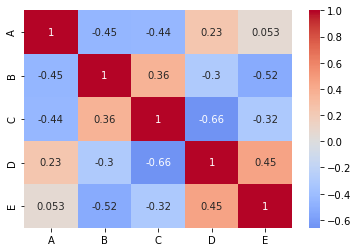

In [ ]:
# Example of heatmap

# Generate some random data
np.random.seed(42)
data1 = pd.DataFrame(np.random.rand(10, 5), columns=list('ABCDE'))

# Compute the correlation matrix
corr = data1.corr()

# Create the heatmap using seaborn
sns.heatmap(corr, cmap='coolwarm', annot=True, center=0)

In [ ]:
data

/opt/conda/lib/python3.9/site-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/opt/conda/lib/python3.9/site-packages/IPython/core/formatters.py:345: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


PLAYER_ID      PLAYER_NAME NICKNAME     TEAM_ID TEAM_ABBREVIATION   AGE  \
0        201985         AJ Price       AJ  1610612754               IND  24.0   
1        201166     Aaron Brooks    Aaron  1610612756               PHX  26.0   
2        201189       Aaron Gray    Aaron  1610612740               NOH  26.0   
3        201151         Acie Law     Acie  1610612744               GSW  26.0   
4          1733    Al Harrington       Al  1610612743               DEN  31.0   
...         ...              ...      ...         ...               ...   ...   
6588    1628380     Zach Collins     Zach  1610612759               SAS  25.0   
6589     203897      Zach LaVine     Zach  1610612741               CHI  27.0   
6590    1630192       Zeke Nnaji     Zeke  1610612743               DEN  22.0   
6591    1630533  Ziaire Williams   Ziaire  1610612763               MEM  21.0   
6592    1629627  Zion Williamson     Zion  1610612740               NOP  22.0   

      GP   W   L  W_PCT  ...  sp_work_PACE_RANK  PIE_RANK  FGM_RANK  FGA_RANK  \
0     50  22  28  0.440  ...                153       278       270       240   
1     59  26  33  0.441  ...                133       259       179       143   
2     41  21  20  0.512  ...                420       332       338       361   
3     51  20  31  0.392  ...                100       307       305       304   
4     73  45  28  0.616  ...                 50       258       130       112   
...   ..  ..  ..    ...  ...                ...       ...       ...       ...   
6588  53  15  38  0.283  ...                124       145       146       172   
6589  61  28  33  0.459  ...                347        83        13         8   
6590  44  29  15  0.659  ...                429       336       298       327   
6591  31  19  12  0.613  ...                165       466       331       319   
6592  29  17  12  0.586  ...                208        18        96       132   

      FGM_PG_RANK  FGA_PG_RANK  FG_PCT_RANK  SEASON_YEAR  SEVERE_INJURY  \
0             253          210          408         2010           True   
1             151          109          390         2010           True   
2             347          378           23         2010           True   
3             326          326          264         2010           True   
4             141          119          319         2010           True   
...           ...          ...          ...          ...            ...   
6588          148          175          116         2022            NaN   
6589           24           28          202         2022            NaN   
6590          320          369           65         2022            NaN   
6591          299          268          383         2022            NaN   
6592           12           45           43         2022            NaN   

      MINOR_INJURY  
0            False  
1            False  
2            False  
3            False  
4            False  
...            ...  
6588           NaN  
6589           NaN  
6590           NaN  
6591           NaN  
6592           NaN  

[6593 rows x 81 columns]

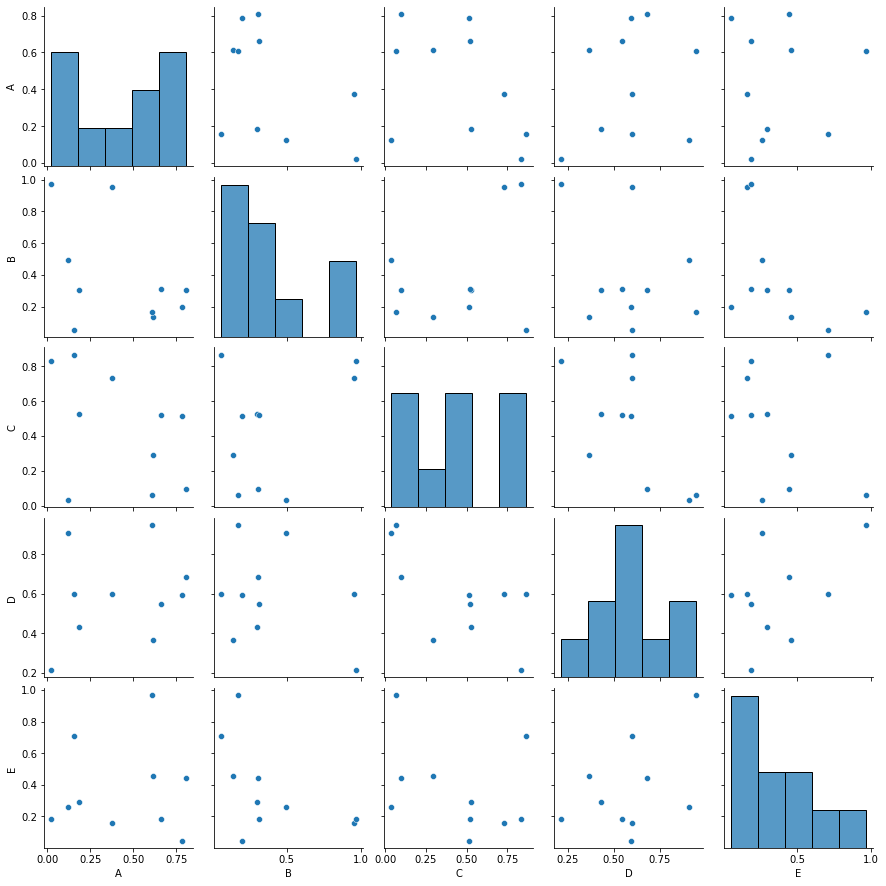

In [ ]:
sns.pairplot(data1, height = 1.5)
plt.show()


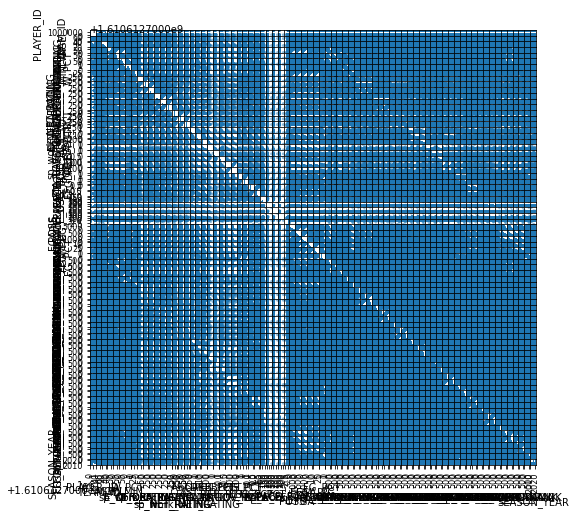

In [ ]:
# Example of scatter matrix

# create a scatter plot matrix
pd.plotting.scatter_matrix(data, diagonal='hist')

# set the plot size
plt.gcf().set_size_inches(8, 8)

# show the plot
plt.show()

NOTE: The scatter_matrix function returns a grid of scatter plots where the diagonal shows the distribution of each variable and the off-diagonal plots show the pairwise correlations between variables. The scatter plots are colored based on the correlation coefficient between the variables, with red indicating a positive correlation and blue indicating a negative correlation.

Note that scatter_matrix can be computationally expensive for large datasets with many variables, as it generates n^2 plots for n variables. In such cases, you may want to consider using other techniques, such as correlation matrices or heatmaps, to visualize the correlations in your data.

DO A CORRELATION MATRIX AND A HEAT MAP!!!!


In [ ]:
nba_variables = data.iloc[:,5:-3]

In [ ]:
mcr = nba_variables.corr()

In [ ]:
cmap = sns.diverging_palette(220, 20, n=200, as_cmap=True)
#cmap = sns.color_palette("seismic", as_cmap=True, n_colors=256)
#cmap.set_bad(color='white')
#cmap.set_over(cmap(1.0))
#cmap.set_under(cmap(0.0))
#center = 0.0

In [ ]:
plt.figure(figsize=(200,200))
sns.heatmap(mcr, annot=True, cmap=cmap, center=0, vmin=-1, vmax=1)
plt.savefig('heatmap.png')

In [ ]:
files.download('heatmap.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
nba_variables = nba_variables.drop(nba_variables.filter(like='RANK').columns, axis=1)

Dropping all variables that contain the word rank, as these don't contain any more information than the raw data, they're just ranking players based on the raw data. Not adding info = not helping the model

In [ ]:
nba_variables

AGE  GP   W   L  W_PCT   MIN  E_OFF_RATING  OFF_RATING  \
0     24.0  50  22  28  0.440  15.9         104.3       104.4   
1     26.0  59  26  33  0.441  21.8         105.9       106.8   
2     26.0  41  21  20  0.512  12.9         107.4       107.4   
3     26.0  51  20  31  0.392  14.2         100.1        99.0   
4     31.0  73  45  28  0.616  22.8         110.3       111.6   
...    ...  ..  ..  ..    ...   ...           ...         ...   
6588  25.0  53  15  38  0.283  21.8         106.3       107.8   
6589  27.0  61  28  33  0.459  36.0         111.4       111.6   
6590  22.0  44  29  15  0.659  13.3         101.8       101.4   
6591  21.0  31  19  12  0.613  16.0         106.7       107.0   
6592  22.0  29  17  12  0.586  33.0         114.3       116.2   

      sp_work_OFF_RATING  E_DEF_RATING  ...    PACE  PACE_PER40  sp_work_PACE  \
0                  104.4         102.7  ...   95.56       79.63         95.56   
1                  106.8         112.5  ...   96.01       80.01         96.01   
2                  107.4         105.3  ...   90.56       75.47         90.56   
3                   99.0         108.2  ...   96.68       80.56         96.68   
4                  111.6         106.7  ...   98.16       81.80         98.16   
...                  ...           ...  ...     ...         ...           ...   
6588               107.8         117.1  ...  103.28       86.07        103.28   
6589               111.6         110.7  ...  100.28       83.57        100.28   
6590               101.4         108.1  ...   98.90       82.41         98.90   
6591               107.0         109.0  ...  102.63       85.53        102.63   
6592               116.2         107.3  ...  102.17       85.14        102.17   

        PIE  POSS  FGM   FGA  FGM_PG  FGA_PG  FG_PCT  
0     0.075  1579  114   320     2.3     6.4   0.356  
1     0.078  2571  220   587     3.7     9.9   0.375  
2     0.065   997   56    99     1.4     2.4   0.566  
3     0.070  1460   81   186     1.6     3.6   0.435  
4     0.078  3389  281   675     3.8     9.2   0.416  
...     ...   ...  ...   ...     ...     ...     ...  
6588  0.105  2487  214   414     4.0     7.8   0.517  
6589  0.123  4583  521  1093     8.5    17.9   0.477  
6590  0.072  1199   87   152     2.0     3.5   0.572  
6591  0.043  1054   67   163     2.2     5.3   0.411  
6592  0.171  2031  285   469     9.8    16.2   0.608  

[6593 rows x 38 columns]

In [ ]:
mcr = nba_variables.corr()
plt.figure(figsize=(200,200))
sns.heatmap(mcr, annot=True, cmap=cmap, center=0, vmin=-1, vmax=1)

<Axes: >

We will drop all variables with "NET" in the variable name, as these are a combination of offensive and defensive stats already in the data, likewise not adding any new information. We will drop all FGM (field goals made) as this has extremely high correlation with FGA (field goals attempted), because a player can have a low number of field goals made, but a high number of attempts. Thus their shot attempts would be more indicative of injury likelihood as accumulating shooting volume could be relatively taxing. We will also drop FGA, as this doesn't add significantly more information than FGA per game (FGA_PG) and minutes played together. 


In [ ]:
nba_variables = nba_variables.drop(nba_variables.filter(like='NET').columns, axis=1)
nba_variables = nba_variables.drop(nba_variables.filter(like='FGM').columns, axis=1)
nba_variables = nba_variables.drop('FGA', axis=1)
nba_variables.head()

AGE  GP   W   L  W_PCT   MIN  E_OFF_RATING  OFF_RATING  \
0  24.0  50  22  28  0.440  15.9         104.3       104.4   
1  26.0  59  26  33  0.441  21.8         105.9       106.8   
2  26.0  41  21  20  0.512  12.9         107.4       107.4   
3  26.0  51  20  31  0.392  14.2         100.1        99.0   
4  31.0  73  45  28  0.616  22.8         110.3       111.6   

   sp_work_OFF_RATING  E_DEF_RATING  ...  USG_PCT  E_USG_PCT  E_PACE   PACE  \
0               104.4         102.7  ...    0.223      0.227   95.35  95.56   
1               106.8         112.5  ...    0.251      0.257   96.79  96.01   
2               107.4         105.3  ...    0.130      0.132   89.79  90.56   
3                99.0         108.2  ...    0.156      0.160   95.96  96.68   
4               111.6         106.7  ...    0.219      0.221   98.80  98.16   

   PACE_PER40  sp_work_PACE    PIE  POSS  FGA_PG  FG_PCT  
0       79.63         95.56  0.075  1579     6.4   0.356  
1       80.01         96.01  0.078  2571     9.9   0.375  
2       75.47         90.56  0.065   997     2.4   0.566  
3       80.56         96.68  0.070  1460     3.6   0.435  
4       81.80         98.16  0.078  3389     9.2   0.416  

[5 rows x 32 columns]

In [ ]:
mcr = nba_variables.corr()
plt.figure(figsize=(200,200))
sns.heatmap(mcr, annot=True, cmap=cmap, center=0, vmin=-1, vmax=1)

<Axes: >

Dropping wins and losses as these have as much to do with team as with player, and also have high multi-colinearity with GP (games played). 

In [ ]:
nba_variables = nba_variables.drop('W', axis=1)
nba_variables = nba_variables.drop('L', axis=1)


In [ ]:
mcr = nba_variables.corr()
plt.figure(figsize=(200,200))
sns.heatmap(mcr, annot=True, cmap=cmap, center=0, vmin=-1, vmax=1)

<Axes: >

Dropping offensive rating as it has high MCR with offensive efficieny rating. Liekwise, dropping SP work off rating as it is a comkposite statistic that does not add new information to the model. Also dropping EFG_PCT and TS_PCT as these are composite variables (estimated field goal percent and true shot percent). 


In [ ]:
nba_variables = nba_variables.drop('OFF_RATING', axis=1)
nba_variables = nba_variables.drop('sp_work_OFF_RATING', axis=1)
nba_variables = nba_variables.drop('DEF_RATING', axis=1)
nba_variables = nba_variables.drop('sp_work_DEF_RATING', axis=1)
nba_variables = nba_variables.drop('EFG_PCT', axis=1)
nba_variables = nba_variables.drop('TS_PCT', axis=1)



<Axes: >

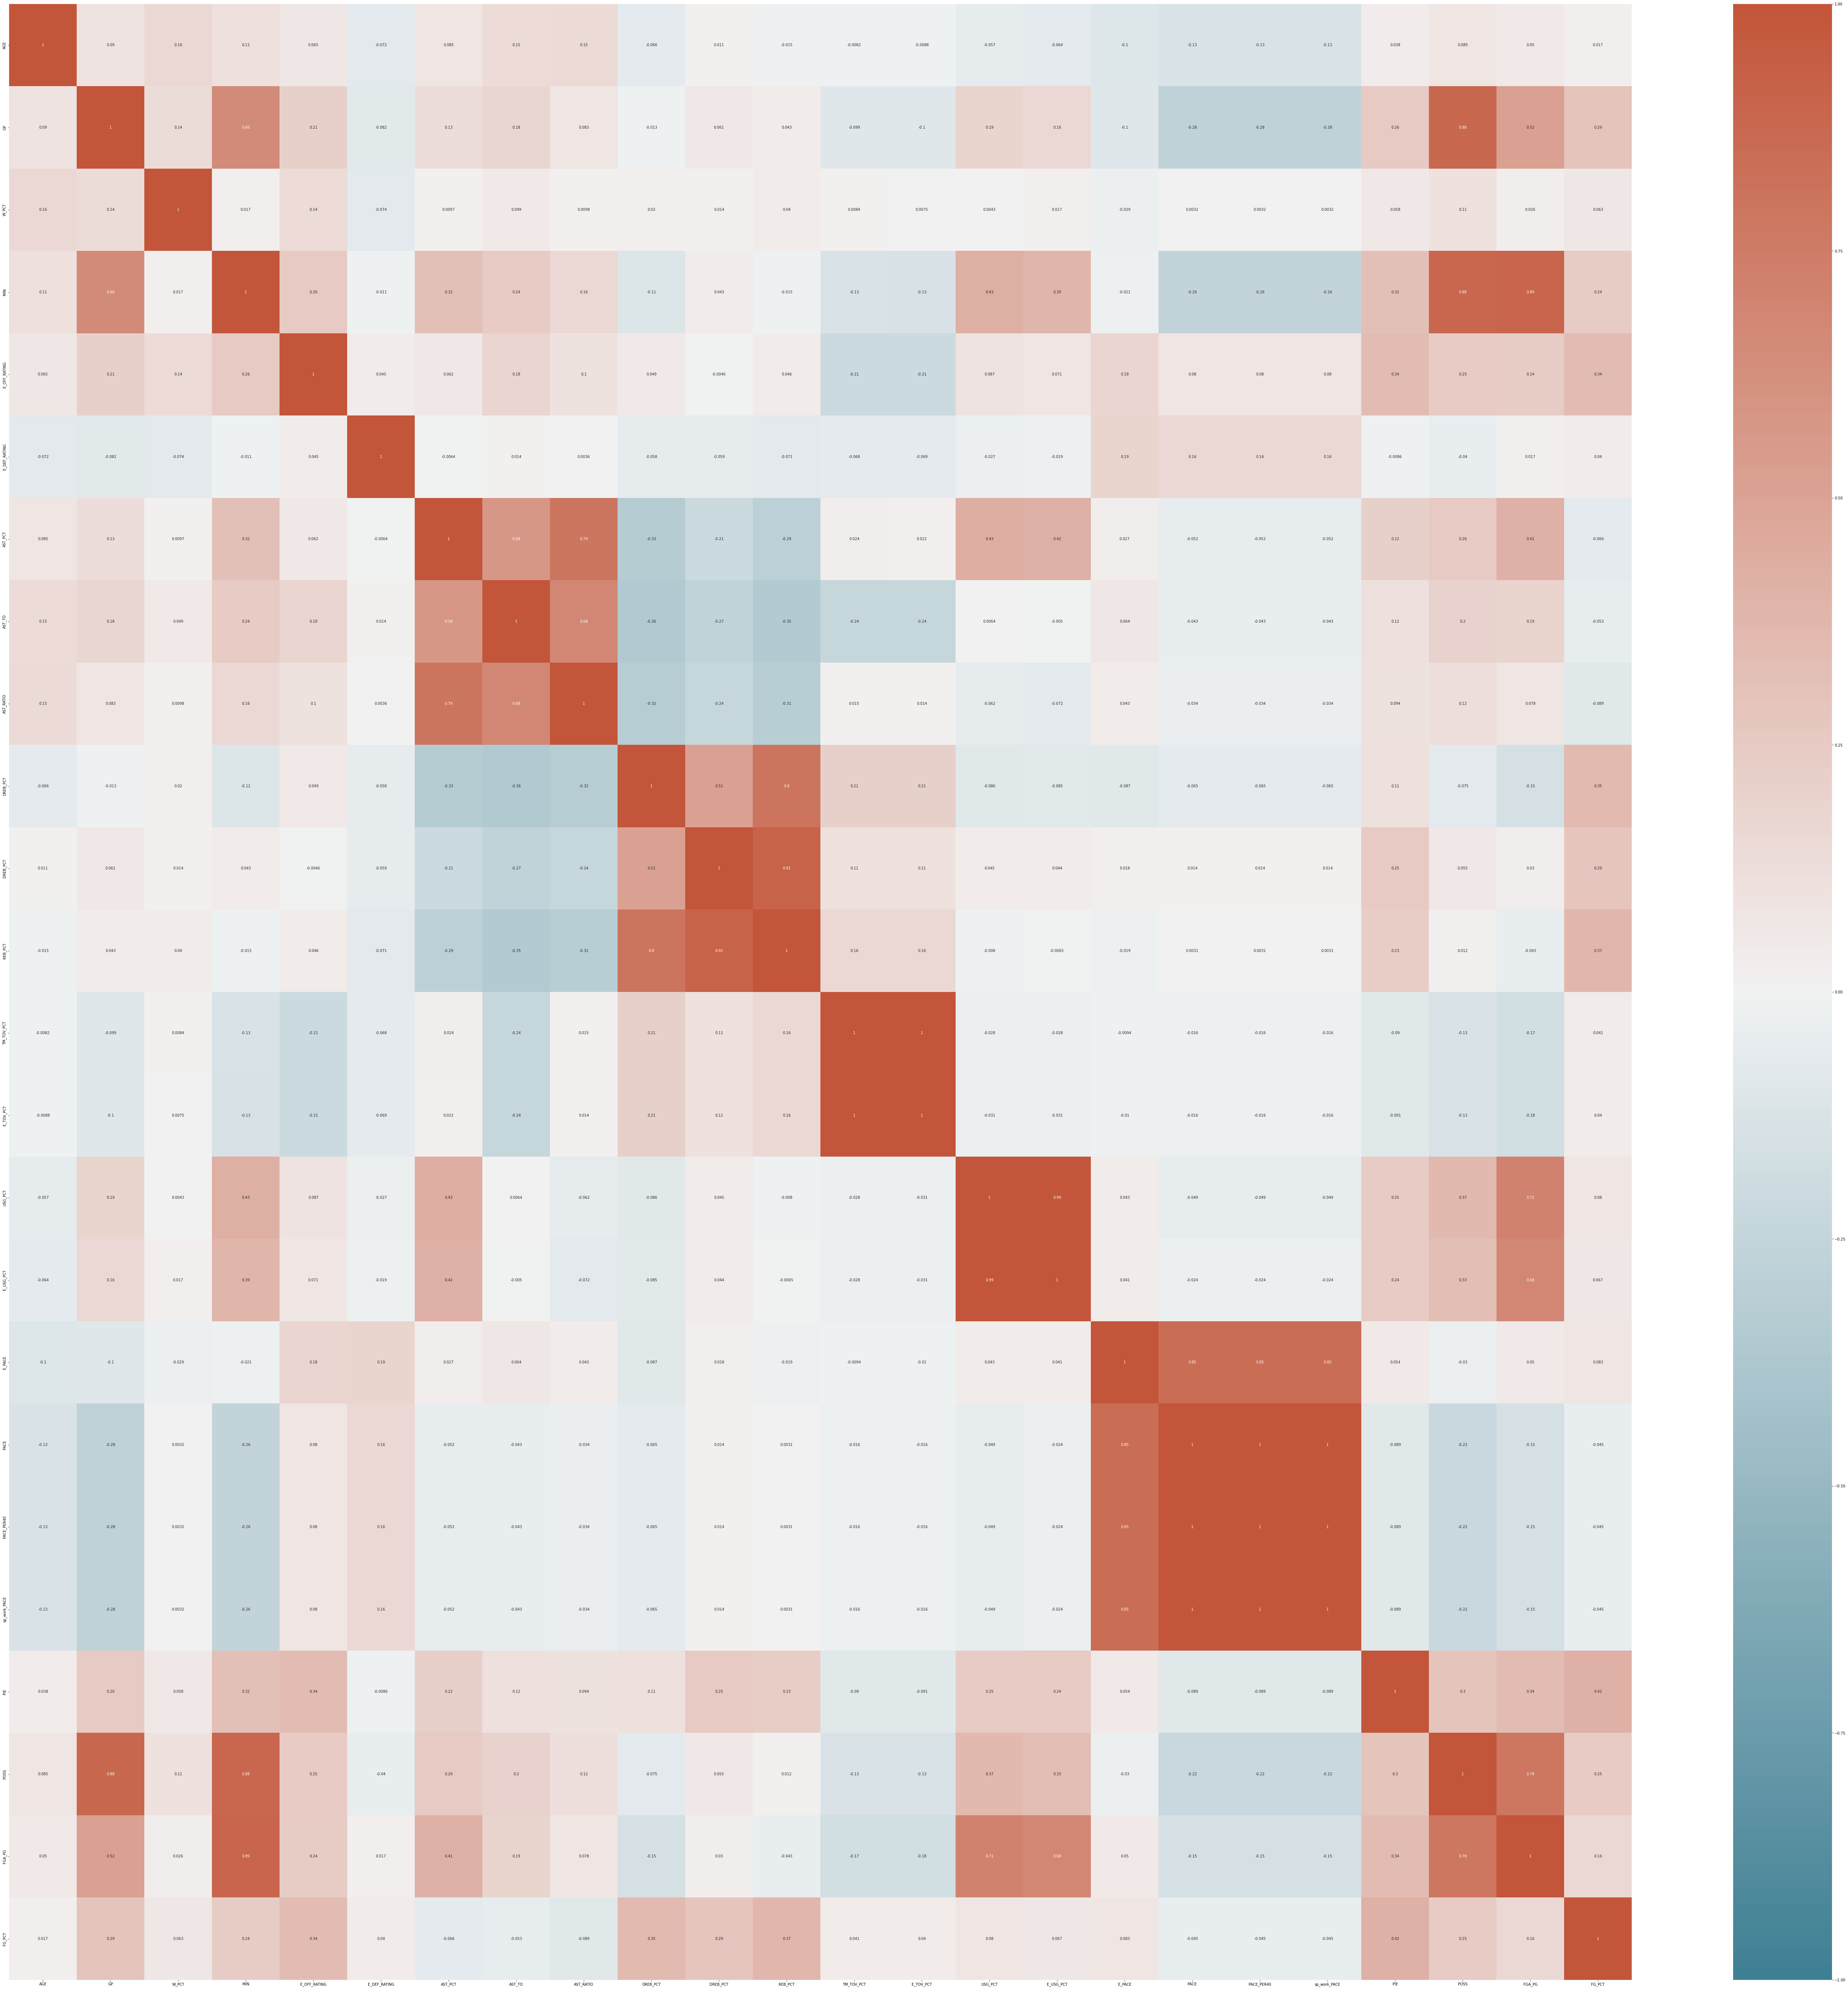

In [ ]:
mcr = nba_variables.corr()
plt.figure(figsize=(100,100))
sns.heatmap(mcr, annot=True, cmap=cmap, center=0, vmin=-1, vmax=1)

Dropping TM_TOV_PCT (team turnover percentage) as it is a team metric with high MCR. Also dropping PACE, sp_work_pace, and e_pace because pace per 40 is a more comprehensive variable to assess a player's performance in a game as a player could have a high PACE or sp_work_PACE just from playing a high volume of minutes, but per 40 constrains Pace chronologically

In [ ]:
nba_variables = nba_variables.drop('TM_TOV_PCT', axis=1)
nba_variables = nba_variables.drop(columns = [ 'PACE', 'sp_work_PACE', 'E_PACE'])


<Axes: >

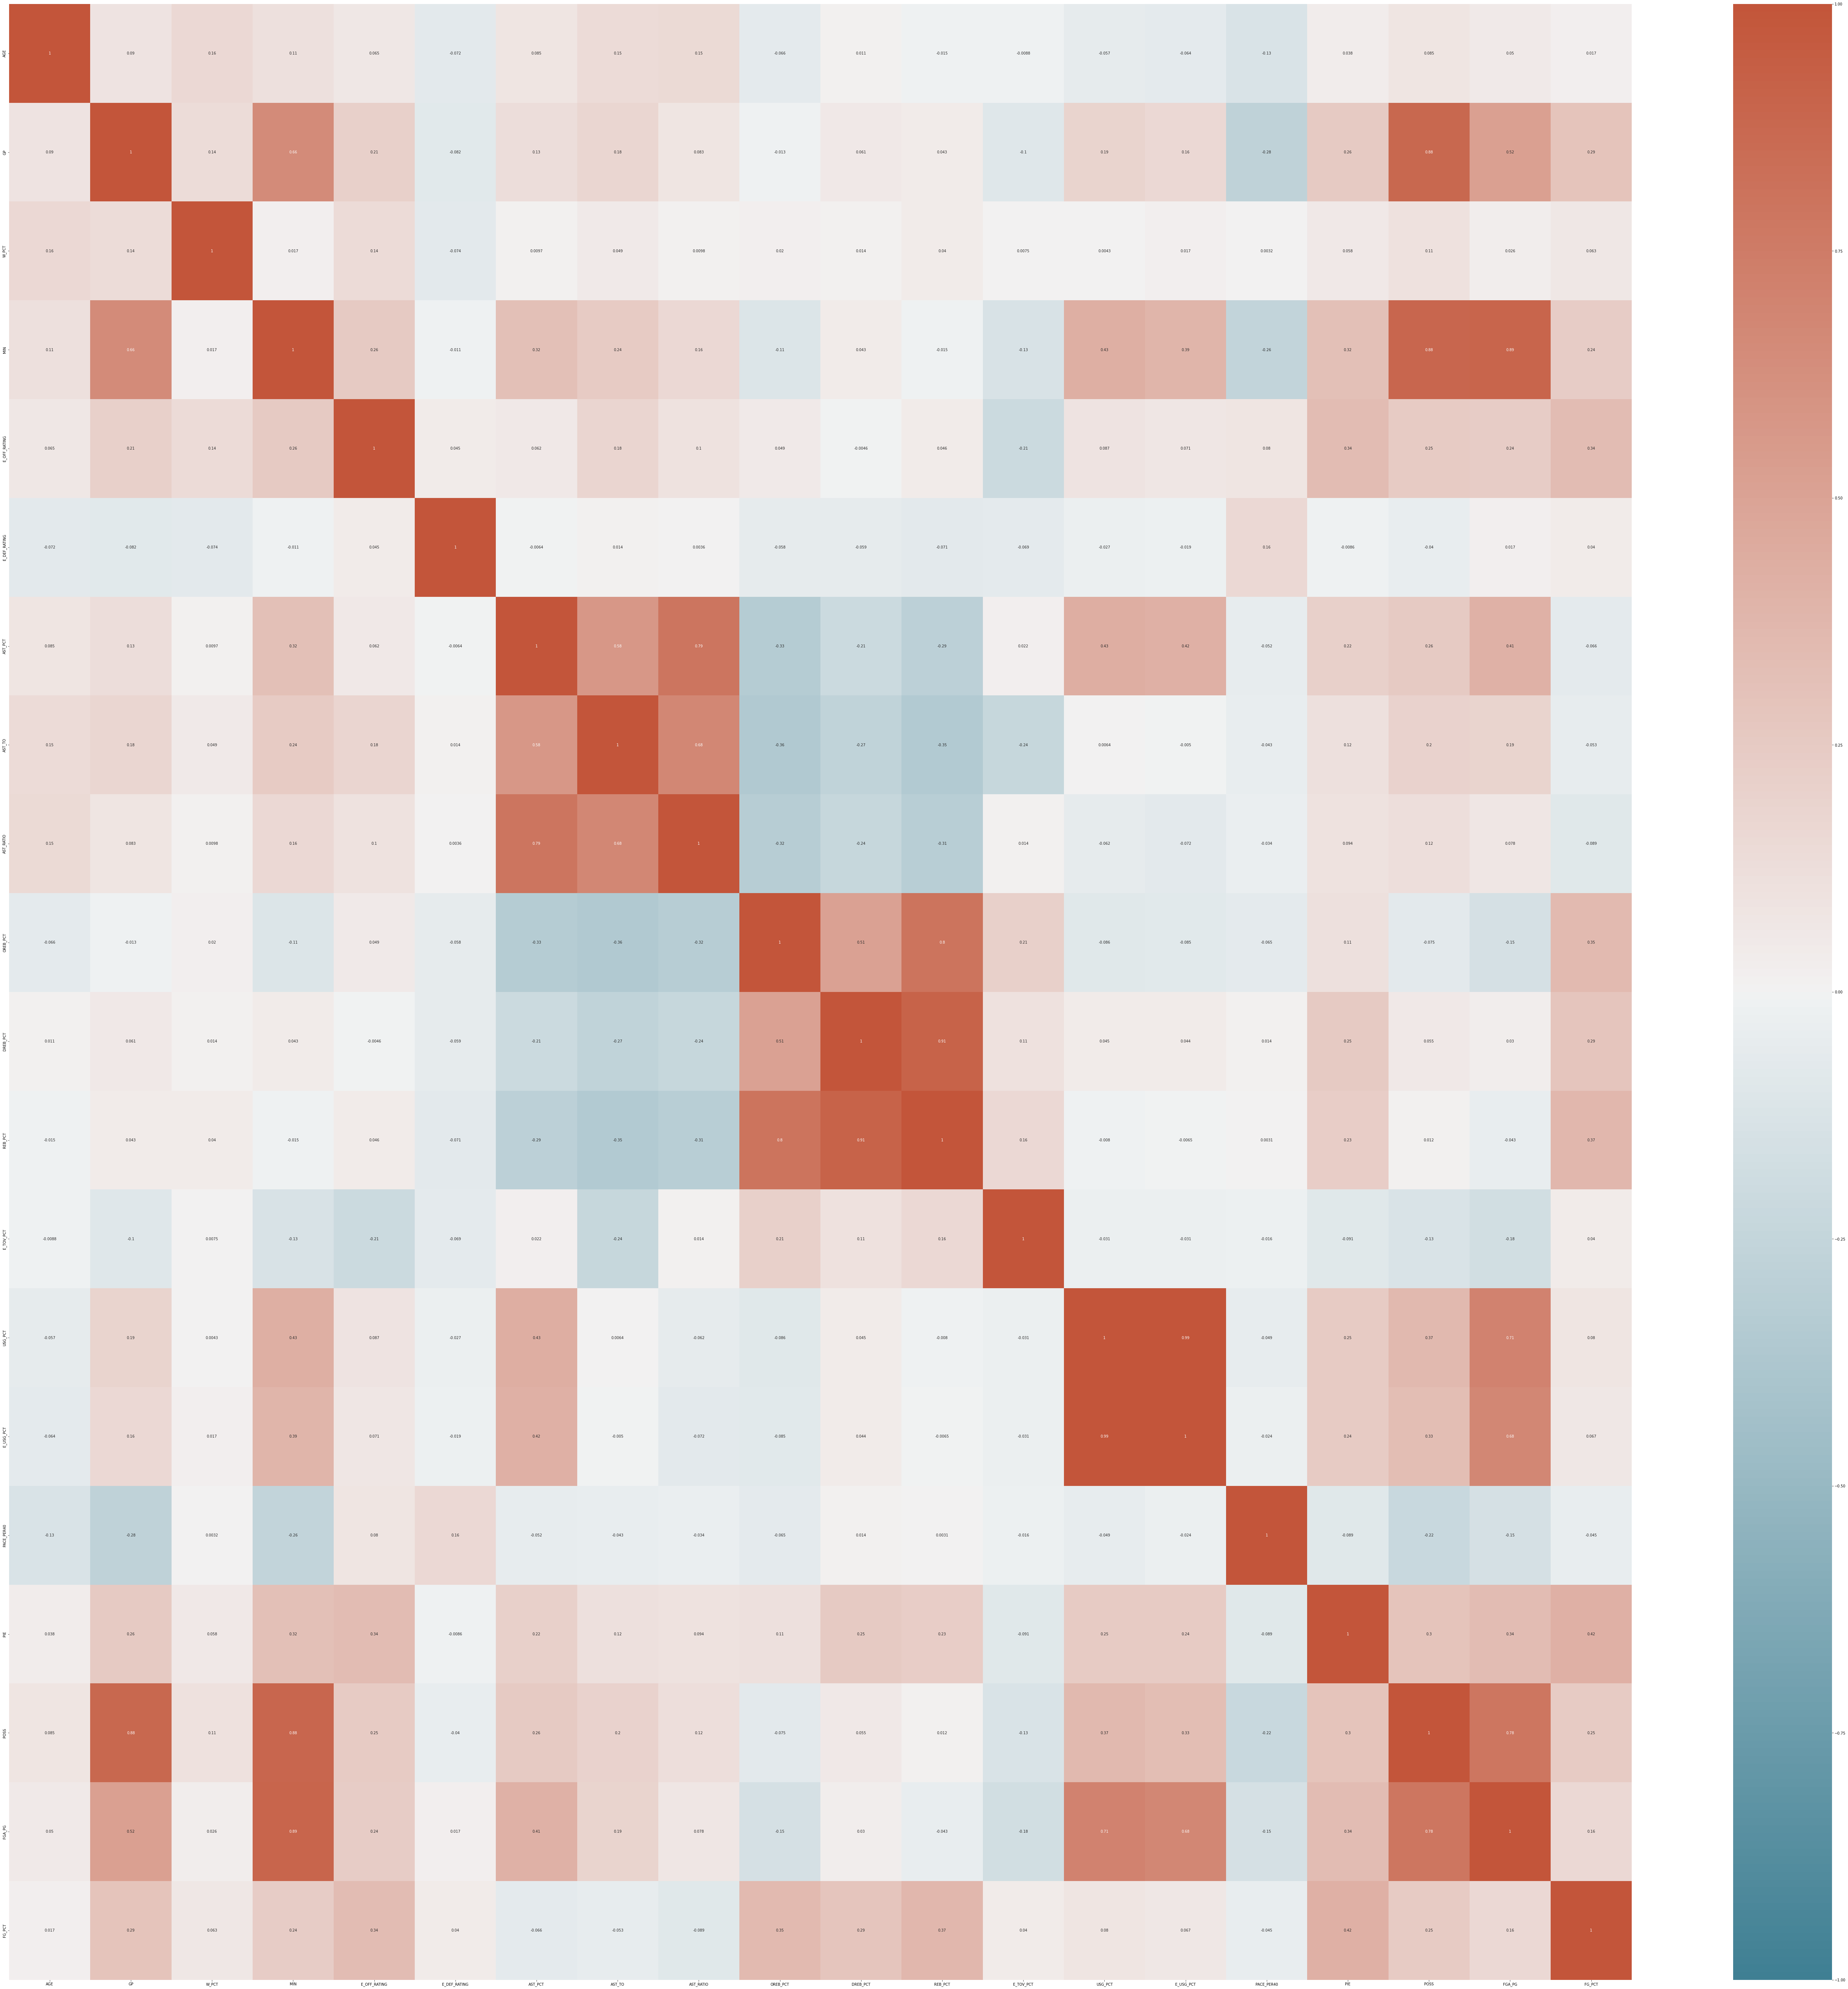

In [ ]:
mcr = nba_variables.corr()
plt.figure(figsize=(100,100))
sns.heatmap(mcr, annot=True, cmap=cmap, center=0, vmin=-1, vmax=1)

In [ ]:
vars_to_keep = nba_variables.columns

In [ ]:
vars_to_keep

Index(['AGE', 'GP', 'W_PCT', 'MIN', 'E_OFF_RATING', 'E_DEF_RATING', 'AST_PCT',
       'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'E_TOV_PCT',
       'USG_PCT', 'E_USG_PCT', 'PACE_PER40', 'PIE', 'POSS', 'FGA_PG',
       'FG_PCT'],
      dtype='object')

In [ ]:
len(vars_to_keep)

20